<a href="https://colab.research.google.com/github/Serahverg-8/Deep-Learning-pytorch/blob/main/Pytorch_model_building_example_pytorch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#device agnostic code
import torch
torch.cuda.is_available()


True

In [3]:
import matplotlib.pyplot as plt
from torch import nn

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:

device

'cuda'

In [6]:


#Getting the DATA


#creating data - linear regression. (known parameters set by us)
#only one feature
weight = 0.7
bias = 0.3


#create
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
#usually we work with 2d so each row is one input 50 X 1 . so add 1 to dim 1

X.shape

torch.Size([50, 1])

In [7]:
#Linear regression. Y

y = X.mul(weight) + bias

In [8]:
train_split = int(0.8 * len(X))

X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]

In [9]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])


In [10]:
def visualize(X_train,y_train,X_test,y_test,predictions=None):
  plt.figure(figsize=(10,5))
  plt.scatter(X_train,y_train,c="blue",s=4,label="Training Data")
  plt.scatter(X_test,y_test,c="red",s=4,label="Test Data")
  if predictions is not  None:
      plt.scatter(X_test,predictions,c="black",s=3,label="Predicted")
  plt.legend()
  plt.plot()

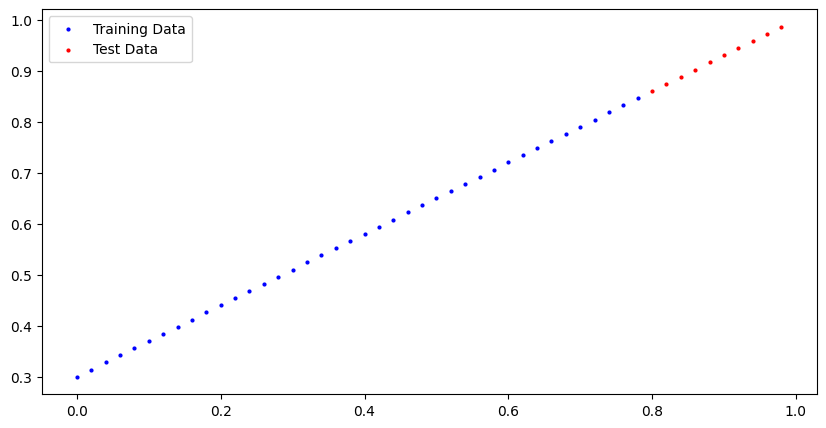

In [11]:
visualize(X_train,y_train,X_test,y_test)

#Manual way

In [12]:
#building a Linear pytorch model

class Linear_Reg(nn.Module):
  def __init__(self):
    super().__init__()

    #weight and bias are objects of the nn class' parameter
    #initializing the parameters
    self.weight=nn.Parameter(torch.rand(1),requires_grad=True)
    self.bias=nn.Parameter(torch.rand(1),requires_grad=True)



  #create the forward pass
  def forward(self,X):
    return X.mul(self.weight) + self.bias




In [13]:
#initialize an instance of this model.
#this will assign the parameters to a random number

#Using nn to create parameters

In [14]:
#building a Linear pytorch model --> nn.Linear Applies a linear transformation to the incoming data:y=xA.T +b

class Linear_Reg(nn.Module):
  def __init__(self):
    super().__init__()

    #Using nn.Linear to create parameter --- > cuz linear regression
    self.linear_layer = nn.Linear(in_features=1,out_features=1,bias=True)
    #Here we have one feature weight, and one output column only and here we are only using one layer.
    #also called linear transform, dense layer etc etc

  #create the forward pass by overridding the forward method of Module
  def forward(self, X):
    return self.linear_layer(X)

In [15]:
torch.manual_seed(42)

model_1= Linear_Reg()


In [16]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [17]:
#reach torch.nn to see all the other functions we can use

# Training the model

In [18]:
#where is the model currently?
next(model_1.parameters()).device

device(type='cpu')

In [19]:
#sending the model to gpu
model_1.to(device)

Linear_Reg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [20]:
next(model_1.parameters()).device

device(type='cuda', index=0)

1.loss.

2.optimizer.

3.training.

4.testing.




Remember, if our model is on the GPU but our data is not on the GPU, it will throw an error. Similarly matplotlib uses numpy

In [22]:
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

In [24]:
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)


torch.manual_seed(42)
epochs=200
epoch_count=[]
train_loss_values =[]
test_loss_values =[]

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_1(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_function(y_pred, y_train)
    # print("loss at", epoch, loss)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_1(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_function(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
      print(loss,test_loss)
      # Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss)
          test_loss_values.append(test_loss)
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")





tensor(0.5437, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5605, device='cuda:0')
Epoch: 0 | MAE Train Loss: 0.5436570048332214 | MAE Test Loss: 0.560505211353302 
tensor(0.5321, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5470, device='cuda:0')
tensor(0.5206, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5336, device='cuda:0')
tensor(0.5091, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5201, device='cuda:0')
tensor(0.4976, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.5066, device='cuda:0')
tensor(0.4861, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4932, device='cuda:0')
tensor(0.4745, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4797, device='cuda:0')
tensor(0.4630, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4662, device='cuda:0')
tensor(0.4515, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4527, device='cuda:0')
tensor(0.4400, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4393, device='cuda:0')
tensor(0.4284, device='cuda:

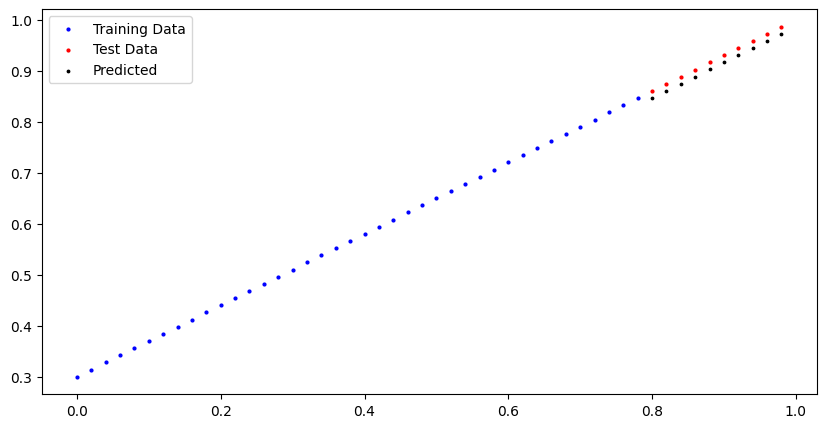

In [27]:
visualize(X_train.cpu(),y_train.cpu(),X_test.cpu(), y_test.cpu(), predictions=test_pred.cpu())

#Saving and loading the model

In [29]:
from pathlib import Path

In [30]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_2_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_2_model_1.pth


In [31]:
# Check the saved file path
!ls -l models/pytorch_2_model_1.pth

-rw-r--r-- 1 root root 1167 Aug 30 00:58 models/pytorch_2_model_1.pth


In [32]:
#loading

# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = Linear_Reg()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
Linear_Reg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [35]:
test_pred.shape

torch.Size([10, 1])

In [37]:

# we have already loaded the best bias and weight

# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
test_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')